##### This notebook is meant to `preprocess videos`. Essentially to normalize or `squeeze/augment` the videos to the required input: `30 frames`. 

1. `Count Frames` of Video.
2. `Squeeze/Augment` videos until they reach `30 frames`. 

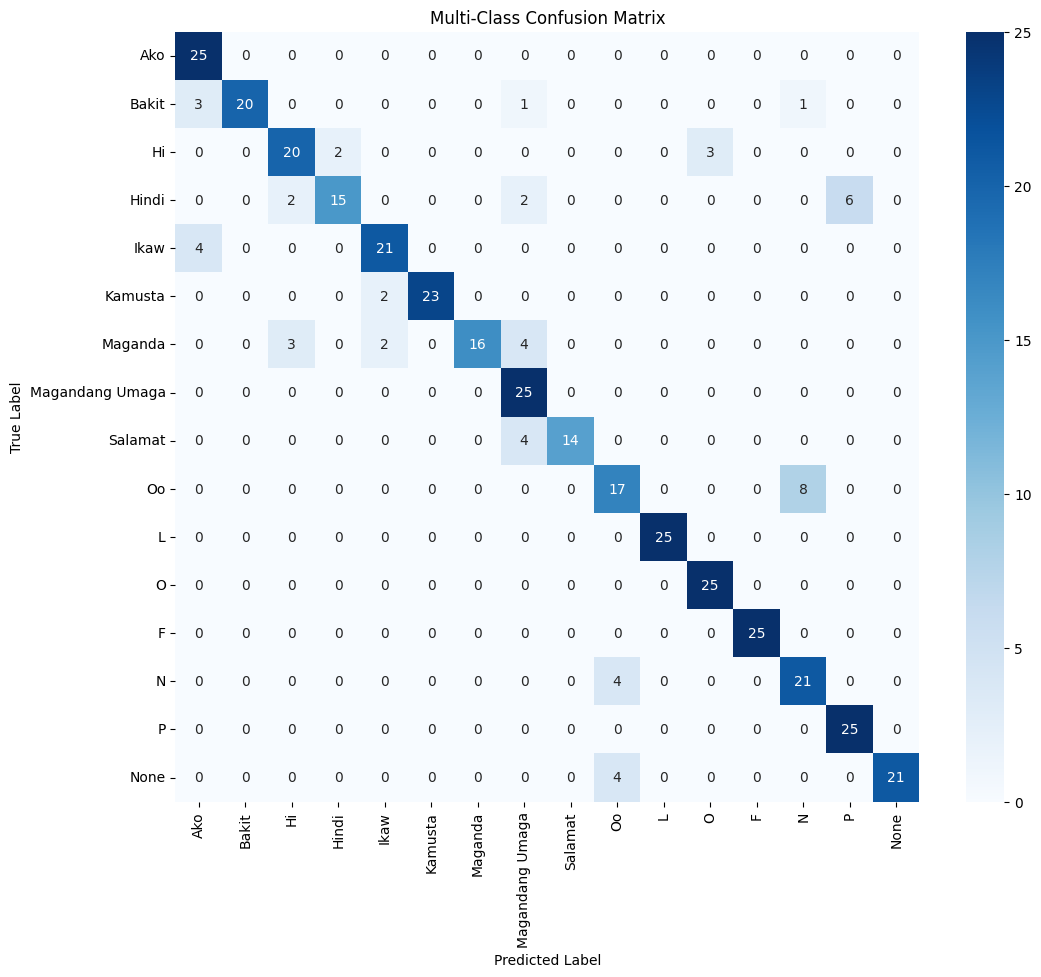

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Creating a dictionary from the provided scores
# Given data
data = {
    "Ako": {"true": 25},
    "Bakit": {"true": 20, "false": {"Ako": 3, "Magandang Umaga": 1, "N": 1}},
    "Hi": {"true": 20, "false": {"Hindi": 2, "O": 3}},
    "Hindi": {"true": 15, "false": {"Hi": 2, "Magandang Umaga": 2, "P": 6}},
    "Ikaw": {"true": 21, "false": {"Ako": 4}},
    "Kamusta": {"true": 23, "false": {"Ikaw": 2}},
    "Maganda": {"true": 16, "false": {"Magandang Umaga": 4, "Hi": 3, "Ikaw": 2}},
    "Magandang Umaga": {"true": 25},
    "Salamat": {"true": 14, "false": {"Magandang Umaga": 4}},
    "Oo": {"true": 17, "false": {"N": 8}},
    "L": {"true": 25},
    "O": {"true": 25},
    "F": {"true": 25},
    "N": {"true": 21, "false": {"Oo": 4}},
    "P": {"true": 25},
    "None": {"true": 21, "false": {"Oo": 4}}, 
}

# Constructing a confusion matrix
# Extract only valid class labels (ignore non-dictionary items)
labels = [label for label in data.keys() if isinstance(data[label], dict)]
num_classes = len(labels)
confusion_matrix = pd.DataFrame(0, index=labels, columns=labels)

# Filling in the diagonal with the true positive counts
for label in labels:
    true_positive = data[label]['true'] if 'true' in data[label] else 0
    confusion_matrix.loc[label, label] = true_positive

# Filling in the false negatives using the false data from the data dictionary
for label in labels:
    false_data = data[label]['false'] if 'false' in data[label] else {}
    for false_label, count in false_data.items():
        if false_label in labels:  # Ensure false_label is a valid class
            confusion_matrix.loc[label, false_label] = count

# Plotting the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Multi-Class Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report
#Initialize lists for true and predicted labels

y_true = []
y_pred = []

#Extract true positives and false negatives

for label, data_dict in data.items():
    if 'true' in data_dict:
        y_true.extend([label] * data_dict['true'])
        y_pred.extend([label] * data_dict['true'])
    if 'false' in data_dict:
        for false_label, count in data_dict['false'].items():
            y_true.extend([label] * count)
            y_pred.extend([false_label] * count)

#Calculate the confusion matrix

cm_labels = sorted(set(y_true))
conf_matrix = confusion_matrix(y_true, y_pred, labels=cm_labels)

# Calculate accuracy

accuracy = accuracy_score(y_true, y_pred)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

class_report = classification_report(y_true, y_pred, target_names=cm_labels)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy)
print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nF1 Score:", f1_score)
print("\nClassification Report:\n", class_report)#

Confusion Matrix:
 [[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3 20  0  0  0  0  0  0  0  1  1  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  2  0  0  0  0  0  0  0  3  0  0  0]
 [ 0  0  0  2 15  0  0  0  0  2  0  0  0  0  6  0]
 [ 4  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 23  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  2  0  0 16  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0 17  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0  0  0  4  0  0  0  0  0 14]]

Accuracy: 0.8600508905852418

Precision: 0.8776944110293438

Recall: 0.8600508905852418

F1 Score: 0.8588927523001996

Classification Report:
                  pre

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report
import numpy as np

# Reformatting the data for confusion matrix computation and classification report
y_true = []
y_pred = []

# True positives
for label, value in data.items():
    if isinstance(value, dict) and 'true' in value:
        y_true.extend([label] * value['true'])
        y_pred.extend([label] * value['true'])

# False negatives and false positives
for label, value in data.items():
    if isinstance(value, dict) and 'false' in value:
        for false_label, count in value['false'].items():
            y_true.extend([label] * count)
            y_pred.extend([false_label] * count)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=labels)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

# Create a classification report
class_report = classification_report(y_true, y_pred, target_names=labels)

conf_matrix, accuracy, precision, recall, f1_score, class_report



(array([[25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 3, 20,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0],
        [ 0,  0, 20,  2,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0],
        [ 0,  0,  2, 15,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  6,  0],
        [ 4,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  2, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  3,  0,  2,  0, 16,  4,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  4, 14,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 17,  0,  0,  0,  8,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  

In [29]:
import pandas as pd
# Assuming y_true and y_pred are your true and predicted labels
class_report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(class_report).transpose()

# Replace NaN values with empty string for better readability
report_df = report_df.replace(np.nan, '', regex=True)

report_df = report_df.round(2)

print(report_df)

                 precision  recall  f1-score  support
Ako                   0.78    1.00      0.88    25.00
Bakit                 1.00    0.80      0.89    25.00
Hi                    1.00    1.00      1.00    25.00
Hindi                 0.80    0.80      0.80    25.00
Ikaw                  0.88    0.60      0.71    25.00
Kamusta               0.84    0.84      0.84    25.00
Maganda               1.00    0.92      0.96    25.00
Magandang Umaga       1.00    1.00      1.00    25.00
Salamat               1.00    0.64      0.78    25.00
Oo                    0.69    1.00      0.82    25.00
L                     0.70    0.84      0.76    25.00
O                     1.00    0.84      0.91    25.00
F                     0.89    1.00      0.94    25.00
N                     0.68    0.68      0.68    25.00
P                     0.81    1.00      0.89    25.00
None                  1.00    0.78      0.88    18.00
accuracy              0.86    0.86      0.86     0.86
macro avg             0.88  

1. `Count Frames` of Video files in a 'video_directory'.

In [3]:
import cv2
import os

# Path to the directory containing the video files
video_dir = r'../videos_copy/signed_videos_processed'

# Initialize total frame count
total_frame_count = 0

# Initialize framearray
framearray = []

# Walk through the directory and its subdirectories
for rOot, dirs, files in os.walk(video_dir):
    # LOop through the files in the current directory
    for file in files:
        # Check if the file is a video file
        if file.endswith('.mp4'):
            # Construct the full path to the video file
            video_path = os.path.join(rOot, file)

            # Open the video file
            video = cv2.VideoCapture(video_path)

            # Check if the video file was opened successfully
            if not video.isOpened():
                print(f"Error opening video file: {video_path}")
                continue

            # Initialize frame count for the current video file
            frame_count = 0

            # Read frames until the video ends
            while True:
                # Read the next frame
                ret, frame = video.read()

                # If frame was not read successfully, it means the video has ended
                if not ret:
                    break

                # Increment frame count for the current video file
                frame_count += 1

            # Release the video file
            video.release()

            # Append the video path and frame count to framearray
            framearray.append((video_path, frame_count))

            # Print the number of frames in the current video file
            # print(f"{video_path}: {frame_count} frames")

            # Add the frame count for the current video file to the total frame count
            total_frame_count += frame_count

# Print the total number of frames in all video files
print(f"Total frames in all videos: {total_frame_count}")

# Print framearray
print(framearray)

[ WARN:0@154.703] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_d9lyif19nl/croot/opencv-suite_1676472756314/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@154.703] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_d9lyif19nl/croot/opencv-suite_1676472756314/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin210 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@154.704] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_d9lyif19nl/croot/opencv-suite_1676472756314/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@154.704] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_d9lyif19nl/croot/opencv-suite_1676472756314/work/modules/vid

Total frames in all videos: 6577
[('../videos_copy/signed_videos_processed/hindi/7.mp4', 32), ('../videos_copy/signed_videos_processed/hindi/6.mp4', 32), ('../videos_copy/signed_videos_processed/hindi/4.mp4', 32), ('../videos_copy/signed_videos_processed/hindi/5.mp4', 32), ('../videos_copy/signed_videos_processed/hindi/1.mp4', 32), ('../videos_copy/signed_videos_processed/hindi/0.mp4', 32), ('../videos_copy/signed_videos_processed/hindi/2.mp4', 32), ('../videos_copy/signed_videos_processed/hindi/3.mp4', 32), ('../videos_copy/signed_videos_processed/hindi/11.mp4', 32), ('../videos_copy/signed_videos_processed/hindi/10.mp4', 32), ('../videos_copy/signed_videos_processed/hindi/12.mp4', 32), ('../videos_copy/signed_videos_processed/hindi/13.mp4', 32), ('../videos_copy/signed_videos_processed/hindi/8.mp4', 32), ('../videos_copy/signed_videos_processed/hindi/9.mp4', 32), ('../videos_copy/signed_videos_processed/magandang umaga/7.mp4', 32), ('../videos_copy/signed_videos_processed/magandang u

[ WARN:0@166.135] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_d9lyif19nl/croot/opencv-suite_1676472756314/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@166.135] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_d9lyif19nl/croot/opencv-suite_1676472756314/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin415 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@166.135] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_d9lyif19nl/croot/opencv-suite_1676472756314/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@166.135] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_d9lyif19nl/croot/opencv-suite_1676472756314/work/modules/vid

2. `Squeeze/Augment` videos based on 'video_directory' results until they reach input requirement: `30 frames`.

In [2]:
import shutil
# Path to the new directory where the processed videos will be saved
new_video_dir = r'../videos_copy/signed_videos_processed'

# Create the new directory if it doesn't exist
os.makedirs(new_video_dir, exist_ok=True)

# Loop through framearray and process each video
for video_path, frame_count in framearray:
    # Construct the output file path by replacing the old directory with the new directory in the input file path
    output_file = video_path.replace(video_dir, new_video_dir)

    # Create any necessary directories for the output file path
    os.makedirs(os.path.dirname(output_file), exist_ok=True)

    if frame_count > 30:
        # Calculate MULTIPLIER as (1 / (frames of the video / 30))
        multiplier = 1 / (frame_count / 30)

        # Use ffmpeg to change the speed of the input video and save it to output_file
        os.system(f'ffmpeg -i "{video_path}" -vf setpts=PTS*{multiplier} "{output_file}"')
    else:
        # Copy input_file to output_file without changing its speed
        shutil.copy(video_path, output_file)

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 12.0.0
  configuration: --prefix=/Users/ktietz/demo/mc3/conda-bld/ffmpeg_1628925491858/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=arm64-apple-darwin20.0.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57